# Titanic 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Model Assessment: To test and validate the model 
# 1. Validation Set Approach
from sklearn.model_selection import train_test_split
# 2. Cross Validation: Since each data point appears in the training as well as test set in diff iteration.
from sklearn.model_selection import KFold

from sklearn.preprocessing import PolynomialFeatures
# For Linear Regression
from sklearn.metrics import mean_absolute_error
# For Logistic Regression
from sklearn.metrics import accuracy_score


In [3]:
train_data_path = 'train.csv'
train_data = pd.read_csv(train_data_path)

print("\nHEAD:")
print("----------")
print(train_data.head(10))

print("\nDATATYPES:")
print("----------")
print(train_data.dtypes)

print("\nSTATISTICS:")
print("----------")
train_data.describe()


HEAD:
----------
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Tim

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


pclass: Ticket class |
1st = Upper
2nd = Middle
3rd = Lower


embarked: Port of embarkment |
C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
#train_data.Age.isnull().sum()

train_data.isnull().sum().to_frame('no. of null values')

,no. of null values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


> We have got:

> 62% of Negative examples <br/>
> 38% of Positive examples

To use Accuracy score as an Evaluation metric: there must be an equal number of observations in each class <br/>
For the evaluation of Titanic model, we will use Accuracy Score

In [145]:
train_data.groupby(by=['Survived']).count()[['PassengerId']]



,PassengerId
Survived,
0,549
1,342


In [146]:
print(549/891)
print(342/891)

0.6161616161616161
0.3838383838383838


# Sex 

### Sex - it has no ordering of values (like Pclass). So use One-hot encoding

In [5]:
train_data.Sex.unique()

array(['male', 'female'], dtype=object)

In [6]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
group_by_sex = train_data.groupby(by=['Sex'])

In [8]:
group_by_sex.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [9]:
#IGNORE

group_by_sex.apply(lambda s: s[s['Survived'] == 1]).count()

PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            290
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
dtype: int64

In [10]:
train_data = pd.get_dummies( train_data, columns = ['Sex'] )

---

In [11]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


# Embarked

In [12]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
group_by_emb = train_data.groupby(by=['Embarked'])

In [14]:
group_by_emb.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male
Embarked,,,,,,,,,,,,
C,168,168,168,168,130,168,168,168,168,69,168,168
Q,77,77,77,77,28,77,77,77,77,4,77,77
S,644,644,644,644,554,644,644,644,644,129,644,644


In [203]:
group_by_emb[group_by_emb['Survived']==1]

KeyError: 'Column not found: False'

In [15]:
group_by_emb.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
Embarked,,,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144,0.434524,0.565476
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030,0.467532,0.532468
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,0.315217,0.684783


In [16]:
train_data = pd.get_dummies( train_data, columns = ['Embarked'] )

In [17]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [19]:
train_data[(train_data['Embarked_C'] == 0) & (train_data['Embarked_Q'] == 0) & (train_data['Embarked_S'] == 0)]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
61,62,1,1,"Icard, Miss. Amelie",38.0,0,0,113572,80.0,B28,1,0,0,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,0,0,113572,80.0,B28,1,0,0,0,0


---

#### Feature engineering

Data Distribution - it summarises the probability of taking on a particular value

# Fare

#### Fare has a Heavy tailed distribution: more probability for taking on a value in tail range than a Gaussian distribution

Text(0, 0.5, 'number of occurence')

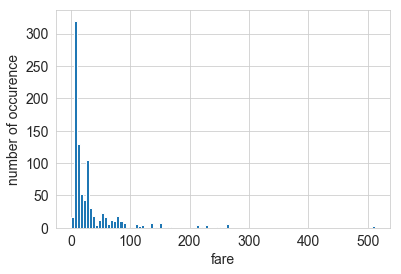

In [20]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

train_data['Fare'].hist(ax=ax, bins=100)

#ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('fare', fontsize=14)
ax.set_ylabel('number of occurence', fontsize=14)

In [21]:
# Log Transformation

train_data[train_data['Fare'] == 0]

# For fare=0, log transform is -infinity. So, add 1 to fares before log transform

#train_data['fare_log_transformed'] = np.log10(train_data['Fare'])
#train_data[train_data['fare_log_transformed'] < 0]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
179,180,0,3,"Leonard, Mr. Lionel",36.0,0,0,LINE,0.0,NaN,0,1,0,0,1
263,264,0,1,"Harrison, Mr. William",40.0,0,0,112059,0.0,B94,0,1,0,0,1
271,272,1,3,"Tornquist, Mr. William Henry",25.0,0,0,LINE,0.0,NaN,0,1,0,0,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",NaN,0,0,239853,0.0,NaN,0,1,0,0,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",19.0,0,0,LINE,0.0,NaN,0,1,0,0,1
413,414,0,2,"Cunningham, Mr. Alfred Fleming",NaN,0,0,239853,0.0,NaN,0,1,0,0,1
466,467,0,2,"Campbell, Mr. William",NaN,0,0,239853,0.0,NaN,0,1,0,0,1
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",NaN,0,0,239854,0.0,NaN,0,1,0,0,1
597,598,0,3,"Johnson, Mr. Alfred",49.0,0,0,LINE,0.0,NaN,0,1,0,0,1
633,634,0,1,"Parr, Mr. William Henry Marsh",NaN,0,0,112052,0.0,NaN,0,1,0,0,1


Text(0, 0.5, 'number of occurence')

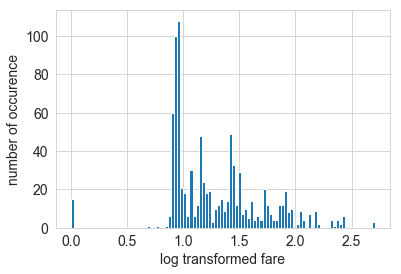

In [22]:
# After log transform the data distribution seems linear(normal)

train_data['fare_log_transformed'] = np.log10(train_data['Fare'] + 1)

sns.set_style('whitegrid')
fig, ax = plt.subplots()

train_data['fare_log_transformed'].hist(ax=ax, bins=100)

ax.tick_params(labelsize=14)
ax.set_xlabel('log transformed fare', fontsize=14)
ax.set_ylabel('number of occurence', fontsize=14)

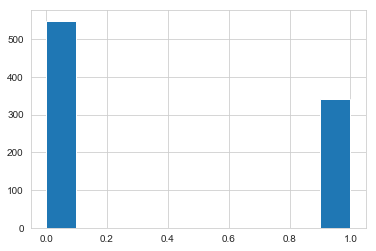

In [23]:
x = train_data.Survived
y = train_data.Fare

#Scatter
#plt.scatter(x, y)

#Line
#plt.plot(x, y)

#histogram
plt.hist(x)

# plt.savefig("name.png")
plt.show() 

---

# Age

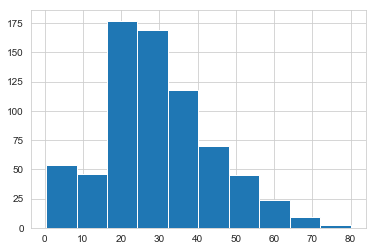

In [24]:
# Univariate Plot: Histogram - to understand each attribute independently

train_data['Age'].hist(bins=10)

In [34]:
train_data[train_data['Age']%1 == 0.5]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_log_transformed
57,58,0,3,"Novel, Mr. Mansouer",28.5,0,0,2697,7.2292,NaN,0,1,1,0,0,0.915358
111,112,0,3,"Zabour, Miss. Hileni",14.5,1,0,2665,14.4542,NaN,1,0,1,0,0,1.189047
116,117,0,3,"Connors, Mr. Patrick",70.5,0,0,370369,7.7500,NaN,0,1,0,1,0,0.942008
122,123,0,2,"Nasser, Mr. Nicholas",32.5,1,0,237736,30.0708,NaN,0,1,1,0,0,1.492352
123,124,1,2,"Webber, Miss. Susan",32.5,0,0,27267,13.0000,E101,1,0,0,0,1,1.146128
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",36.5,0,2,230080,26.0000,F2,0,1,0,0,1,1.431364
152,153,0,3,"Meo, Mr. Alfonzo",55.5,0,0,A.5. 11206,8.0500,NaN,0,1,0,0,1,0.956649
153,154,0,3,"van Billiard, Mr. Austin Blyler",40.5,0,2,A/5. 851,14.5000,NaN,0,1,0,0,1,1.190332
203,204,0,3,"Youseff, Mr. Gerious",45.5,0,0,2628,7.2250,NaN,0,1,1,0,0,0.915136
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",20.5,0,0,A/5 21173,7.2500,NaN,0,1,0,0,1,0.916454


Text(0, 0.5, 'number of occurence')

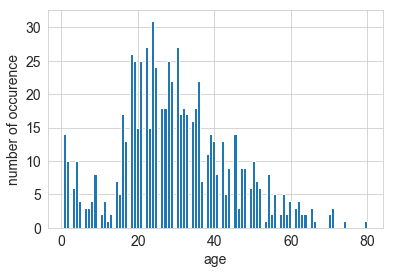

In [35]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

train_data['Age'].hist(ax=ax, bins=100)

#ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('age', fontsize=14)
ax.set_ylabel('number of occurence', fontsize=14)

In [36]:
train_data['Age'].isnull().sum()

177

In [37]:
train_data[train_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_log_transformed
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,0,1,0,1,0,0.975813
17,18,1,2,"Williams, Mr. Charles Eugene",NaN,0,0,244373,13.0000,NaN,0,1,0,0,1,1.146128
19,20,1,3,"Masselmani, Mrs. Fatima",NaN,0,0,2649,7.2250,NaN,1,0,1,0,0,0.915136
26,27,0,3,"Emir, Mr. Farred Chehab",NaN,0,0,2631,7.2250,NaN,0,1,1,0,0,0.915136
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",NaN,0,0,330959,7.8792,NaN,1,0,0,1,0,0.948374
29,30,0,3,"Todoroff, Mr. Lalio",NaN,0,0,349216,7.8958,NaN,0,1,0,0,1,0.949185
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,1,0,PC 17569,146.5208,B78,1,0,1,0,0,2.168853
32,33,1,3,"Glynn, Miss. Mary Agatha",NaN,0,0,335677,7.7500,NaN,1,0,0,1,0,0.942008
36,37,1,3,"Mamee, Mr. Hanna",NaN,0,0,2677,7.2292,NaN,0,1,1,0,0,0.915358
42,43,0,3,"Kraeff, Mr. Theodor",NaN,0,0,349253,7.8958,NaN,0,1,1,0,0,0.949185


In [ ]:
#train_data['Age'].replace(0, np.nan, inplace= True)

In [60]:
mean_value = train_data['Age'].mean()
print(mean_value)

29.1767049580773


In [61]:
train_data['Age'] = train_data['Age'].fillna(mean_value)

In [62]:
train_data['Age'].isnull().sum()

0

In [42]:
train_data['age_binned'] = np.floor_divide(train_data['Age'], 10)
print (train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [64]:
bins = [0, 12, 17, 24, 34, 44, 54, 64, 74, 100]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]
train_data['age_binned'] = pd.cut(train_data['Age'], bins, labels=labels)
print (train_data['age_binned'])

0      4
1      5
2      4
3      5
4      4
5      4
6      4
7      4
8      4
9      2
10     1
11     7
12     4
13     4
14     2
15     7
16     4
17     4
18     4
19     4
20     4
21     4
22     2
23     4
24     1
25     5
26     4
27     4
28     4
29     4
      ..
861    4
862    6
863    4
864    4
865    5
866    4
867    4
868    4
869    4
870    4
871    6
872    4
873    4
874    4
875    2
876    4
877    4
878    4
879    7
880    4
881    4
882    3
883    4
884    4
885    5
886    4
887    3
888    4
889    4
890    4
Name: age_binned, Length: 891, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]


In [ ]:
PolyFeatures

In [ ]:
# DO NOT EXECUTE BELOW FILLNA 'AGE' codes

In [53]:
mean_value_female = train_data[train_data['Sex_female']== 1]['Age'].mean()
mean_value_male = train_data[train_data['Sex_male']== 1]['Age'].mean()

print(str(mean_value_male) + " | " + str(mean_value_female))

30.50582424304206 | 28.216730048707397


In [54]:
train_data['Age'] = train_data[train_data['Sex_female']== 1]['Age'].fillna(mean_value_female)

In [55]:
train_data['Age'].isnull().sum()

577

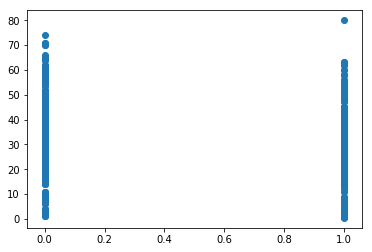

In [103]:
x = train_data.Survived
y = train_data.Age

#Scatter
plt.scatter(x, y)

#Line
#plt.plot(x, y)

#histogram
#plt.hist(x)

# plt.savefig("name.png")
plt.show() 

In [104]:
# Filling the Missing values

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


## Split dataset into test and cv

In [118]:
from sklearn.model_selection import train_test_split


feature_cols=['Pclass', 'Fare', 'Age', 'Sex_female', 'Sex_male']
X = train_data[feature_cols]
y = train_data.Survived

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=1)                                             

In [124]:
from sklearn.model_selection import train_test_split


feature_cols=['Pclass', 'fare_log_transformed', 'Age','Sex_female', 'Sex_male']
X = train_data[feature_cols]
y = train_data.Survived

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=1)                                             

In [219]:
from sklearn.model_selection import train_test_split


feature_cols=['Pclass', 'fare_log_transformed', 'age_binned','Sex_female', 'Sex_male', 'Pclass', 'Parch']
X = train_data[feature_cols]
y = train_data.Survived

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=1)    

In [339]:
from sklearn.model_selection import train_test_split

feature_cols=['Pclass', 'fare_log_transformed', 'age_binned',\
              'Sex_female', 'Sex_male', \
              'Pclass', 'Parch', \
              'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = train_data[feature_cols]
y = train_data.Survived

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=1)  

In [220]:
train_x.describe()

,Pclass,fare_log_transformed,age_binned,Sex_female,Sex_male,Pclass,Parch
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.300562,1.287056,2.467697,0.349719,0.650281,2.300562,0.370787
std,0.836643,0.421244,1.401856,0.477216,0.477216,0.836643,0.775968
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.949185,2.000000,0.000000,0.000000,2.000000,0.000000
50%,3.000000,1.189162,2.000000,0.000000,1.000000,3.000000,0.000000
75%,3.000000,1.501002,3.000000,1.000000,1.000000,3.000000,0.000000
max,3.000000,2.710396,8.000000,1.000000,1.000000,3.000000,6.000000


In [81]:
from sklearn.model_selection import KFold

kfold = KFold(10, True, 1)

for train, test in kfold.split(train_data):
    print(train.size)
    print(test.size)

801
90
802
89
802
89
802
89
802
89
802
89
802
89
802
89
802
89
802
89


In [221]:
# Polynomial Features 

feature_cols=['Pclass', 'fare_log_transformed', 'age_binned','Sex_female', 'Sex_male', 'Pclass', 'Parch']

X = train_data[feature_cols]
y = train_data.Survived

X_poly = PolynomialFeatures(include_bias=False).fit_transform(X)


print(X.shape)
print(X_poly.shape)

(891, 7)
(891, 35)


In [208]:
X_poly

array([[3.        , 0.91645395, 2.        , ..., 1.        , 3.        ,
        9.        ],
       [1.        , 1.85903797, 3.        , ..., 0.        , 0.        ,
        1.        ],
       [3.        , 0.95060822, 2.        , ..., 0.        , 0.        ,
        9.        ],
       ...,
       [3.        , 1.38827886, 2.        , ..., 0.        , 0.        ,
        9.        ],
       [1.        , 1.49136169, 2.        , ..., 1.        , 1.        ,
        1.        ],
       [3.        , 0.94200805, 3.        , ..., 1.        , 3.        ,
        9.        ]])

In [149]:
train_x, test_x, train_y, test_y = train_test_split(X_poly, y, test_size=0.20, random_state=1)    

# 1. Naive Bayes

##### Naive Bayes (NB) Classification - performs well in binary classification tasks 

In [340]:
from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
gnb_model = GaussianNB()

# Train our classifier
gnb_model.fit(train_x, train_y)

# Make predictions
predict = gnb_model.predict(test_x)

### Evaluation - Accuracy Score

In [341]:

# Evaluate accuracy
print(accuracy_score(test_y, predict))

0.7653631284916201


# 2. Logistic Regression

In [342]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression(random_state=1)

linear_model.fit(train_x, train_y)

predict_lin = linear_model.predict(test_x)

/Users/sathishkaliamoorthy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [343]:
# Evaluate accuracy: normal Fare
print(accuracy_score(test_y, predict_lin))

0.7877094972067039


In [129]:
# Evaluate accuracy: fare_log_transformed
print(accuracy_score(test_y, predict_lin))

0.7932960893854749


In [141]:
# Evaluate accuracy: fare_log_transformed
print(accuracy_score(test_y, predict_lin))

0.7821229050279329


In [151]:
# Evaluate accuracy: fare_log_transformed
print(accuracy_score(test_y, predict_lin))

0.770949720670391


---

# 3. SVM

In [399]:
# Implementing grid_serach

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import math

feature_cols=['Pclass', 'fare_log_transformed', 'age_binned',\
              'Sex_female', 'Sex_male', \
              'Pclass', 'Parch', \
              'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = train_data[feature_cols]
y = train_data.Survived

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1)  


In [407]:
print(train_x.shape)
print(test_x.shape)

print(train_y.shape)
print(test_y.shape)

(668, 10)
(223, 10)
(668,)
(223,)


In [409]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 200, 1000, 2000]
gammas = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 1000]

prediction_accuracy = 0
best_c = 0
best_gamma = 0
accuracy_score_val = 0.0

for c in Cs:
    for gamma in gammas:
        model = svm.SVC(C=c,gamma=gamma)
        model.fit(train_x, train_y)
                
        if prediction_accuracy < accuracy_score_val:
            prediction_accuracy = accuracy_score_val
            best_c = c
            best_gamma = gamma
            
        print(str(c) + "\t" + str(gamma) + "\t:" + str(accuracy_score_val))
        
        predicted_svm = model.predict(test_x)
        print(accuracy_score(test_y, predicted_svm))
        
        
print("gamma: " + str(best_gamma) + "  C: " + str(best_c) + " prediction: " + str(prediction_accuracy))

0.001	0.001	:0.0
0.5739910313901345
0.001	0.01	:0.0
0.5739910313901345
0.001	0.1	:0.0
0.5739910313901345
0.001	1	:0.0
0.5739910313901345
0.001	10	:0.0
0.5739910313901345
0.001	100	:0.0
0.5739910313901345
0.001	200	:0.0
0.5739910313901345
0.001	300	:0.0
0.5739910313901345
0.001	1000	:0.0
0.5739910313901345
0.01	0.001	:0.0
0.5739910313901345
0.01	0.01	:0.0
0.5739910313901345
0.01	0.1	:0.0
0.5739910313901345
0.01	1	:0.0
0.5739910313901345
0.01	10	:0.0
0.5739910313901345
0.01	100	:0.0
0.5739910313901345
0.01	200	:0.0
0.5739910313901345
0.01	300	:0.0
0.5739910313901345
0.01	1000	:0.0
0.5739910313901345
0.1	0.001	:0.0
0.5739910313901345
0.1	0.01	:0.0
0.5919282511210763
0.1	0.1	:0.0
0.7937219730941704
0.1	1	:0.0
0.7354260089686099
0.1	10	:0.0
0.5919282511210763
0.1	100	:0.0
0.5739910313901345
0.1	200	:0.0
0.5739910313901345
0.1	300	:0.0
0.5739910313901345
0.1	1000	:0.0
0.5739910313901345
1	0.001	:0.0
0.6098654708520179
1	0.01	:0.0
0.7847533632286996
1	0.1	:0.0
0.7892376681614349
1	1	:0.0
0.77

In [387]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 200, 1000, 2000]
gammas = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 1000]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid)
grid_search.fit(X, y)
grid_search.best_params_

/Users/sathishkaliamoorthy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 2000, 'gamma': 0.01}

In [388]:
from sklearn import svm

clf = svm.SVC(C=0.1,gamma=1)
clf.fit(train_x, train_y)  

predicted_svm = clf.predict(test_x)
print(accuracy_score(test_y, predicted_svm))

0.7374301675977654


In [162]:
# Using K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn import svm

kfold = KFold(10, False, 2)

feature_cols=['Pclass', 'fare_log_transformed', 'age_binned',\
              'Sex_female', 'Sex_male', \
               'Parch', \
              'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = train_data[feature_cols]
y = train_data.Survived

model_svm = svm.SVC(C=100,gamma=1)
accuracy_scores = []

for train_index, test_index in kfold.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    #print(X.iloc[train_index])
    
    train_x, test_x, train_y, test_y = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    clf.fit(train_x, train_y)  
    predicted_svm = clf.predict(test_x)
    
    acc_score = accuracy_score(test_y, predicted_svm)
    print(acc_score)
    accuracy_scores.append(acc_score)
    

print("Mean: " + str(acc_score.mean()))
print("Std: " + str(acc_score.std()))

0.7777777777777778
0.7865168539325843
0.7191011235955056
0.8426966292134831
0.7528089887640449
0.797752808988764
0.7528089887640449
0.7191011235955056
0.8651685393258427
0.7752808988764045
Mean: 0.7752808988764045
Std: 0.0


In [117]:
import sklearn.metrics

print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])


In [163]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

kfold = KFold(10, False, 2)


feature_cols=['Pclass', 'fare_log_transformed', 'age_binned',\
              'Sex_female', 'Sex_male', \
               'Parch', \
              'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = train_data[feature_cols]
y = train_data.Survived

model_svm = svm.SVC(C=100,gamma=1)

cross_val_scores = cross_val_score(model_svm, X, y, cv=kfold, scoring='accuracy')

print("Mean: " + str(cross_val_scores.mean()))
print("Std: " + str(cross_val_scores.std()))

Mean: 0.7968539325842696
Std: 0.03809900126296223


In [175]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 0.3, 1, 3, 10, 100, 200, 1000, 2000]
gammas = [0.001, 0.01, 0.1, 0.3, 1, 3, 10, 100, 200, 300, 1000, 2000]


kfold = KFold(10, False, 2)


feature_cols=['Pclass', 'fare_log_transformed', 'age_binned',\
              'Sex_female', 'Sex_male', \
               'Parch', \
              'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = train_data[feature_cols]
y = train_data.Survived

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X, y)
grid_search.best_params_


{'C': 1000, 'gamma': 0.01}

In [176]:
model_svm = svm.SVC(kernel='rbf', C=1000,gamma=0.01)

model_svm.fit(X,y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [182]:
# Learning Curves

from sklearn.model_selection import learning_curve

kfold = KFold(10, False, 2)

train_sizes, train_scores, test_scores = learning_curve(svm.SVC(kernel='rbf', C=1000,gamma=0.01), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=kfold,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))


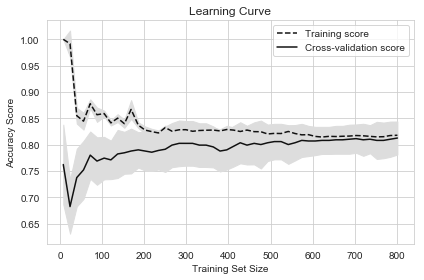

In [183]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [360]:
predict_lin = clf.predict(test_data_x)

In [166]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'survived': predict_lin})
output.to_csv('submission.csv', index=False)

output[output['survived']==1].sum()

NameError: name 'test_data' is not defined

In [167]:
test_data = pd.read_csv("test.csv")

test_data = pd.get_dummies( test_data, columns = ['Sex'] )
test_data = pd.get_dummies( test_data, columns = ['Embarked'] )

test_data["Fare"].fillna(0, inplace = True) 

mean_value = test_data['Age'].mean()
test_data['Age'] = test_data['Age'].fillna(mean_value)

In [168]:
print(test_data.describe())
print(feature_cols)

       PassengerId      Pclass         Age       SibSp       Parch  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   
std     120.810458    0.841838   12.634534    0.896760    0.981429   
min     892.000000    1.000000    0.170000    0.000000    0.000000   
25%     996.250000    1.000000   23.000000    0.000000    0.000000   
50%    1100.500000    3.000000   30.272590    0.000000    0.000000   
75%    1204.750000    3.000000   35.750000    1.000000    0.000000   
max    1309.000000    3.000000   76.000000    8.000000    9.000000   

             Fare  Sex_female    Sex_male  Embarked_C  Embarked_Q  Embarked_S  
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000  
mean    35.541956    0.363636    0.636364    0.244019    0.110048    0.645933  
std     55.867684    0.481622    0.481622    0.430019    0.313324    0.478803  
min      0.000000    0.000000    0.000000    0.00

In [170]:
test_data['fare_log_transformed'] = np.log10(test_data['Fare'] + 1)

#test_data['age_binned'] = np.floor_divide(test_data['Age'], 10)
bins = [0, 12, 17, 24, 34, 44, 54, 64, 74, 100]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]
train_data['age_binned'] = pd.cut(train_data['Age'], bins, labels=labels)

In [171]:
test_data_x = test_data[feature_cols]

test_data_x.describe()

,Pclass,fare_log_transformed,age_binned,Sex_female,Sex_male,Parch,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,1.306736,2.681818,0.363636,0.636364,0.392344,0.244019,0.110048,0.645933
std,0.841838,0.424751,1.288840,0.481622,0.481622,0.981429,0.430019,0.313324,0.478803
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.949185,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.189047,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.511507,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,2.710396,7.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000


In [177]:
predict_svm = model_svm.predict(test_data_x)

In [178]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'survived': predict_svm})
output.to_csv('submission.csv', index=False)

In [179]:
output[output['survived']==1].sum()

PassengerId    165559
survived          150
dtype: int64

In [268]:
predict_lin = linear_model.predict(test_data_x)

In [269]:
predict_lin.shape

(418,)

In [271]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'survived': predict_lin})
output.to_csv('submission.csv', index=False)

In [272]:
output[output['survived']==1].sum()

PassengerId    164221
survived          149
dtype: int64

In [273]:
output.head()

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
